# (7주차) 10월25일 
> Partial correlation, 행을선택하는 방법, fifa22자료 시각화 

- toc:true
- branch: master
- badges: true
- comments: true
- author: 최규빈

## Partial Correlation 

### 아이스크림을 많이 먹으면 걸리는 병 

`-` ref- 데이터 과학자의 사고법: 더 나은 선택을 위한 통계학적 통찰의 힘 

https://books.google.co.kr/books?id=qy4iEAAAQBAJ&pg=PT87&lpg=PT87&dq=%EC%95%84%EC%9D%B4%EC%8A%A4%ED%81%AC%EB%A6%BC%EC%9D%84+%EB%A7%8E%EC%9D%B4+%EB%A8%B9%EC%9C%BC%EB%A9%B4+%EA%B1%B8%EB%A6%AC%EB%8A%94+%EB%B3%91+%EC%86%8C%EC%95%84%EB%A7%88%EB%B9%84&source=bl&ots=V9B7ZG6oR-&sig=ACfU3U0UMd4ehuRXYxI69TT6lIlU-r91bA&hl=en&sa=X&ved=2ahUKEwj13JSV19LzAhVEGaYKHdgfDgcQ6AF6BAgCEAM#v=onepage&q=%EC%95%84%EC%9D%B4%EC%8A%A4%ED%81%AC%EB%A6%BC%EC%9D%84%20%EB%A7%8E%EC%9D%B4%20%EB%A8%B9%EC%9C%BC%EB%A9%B4%20%EA%B1%B8%EB%A6%AC%EB%8A%94%20%EB%B3%91%20%EC%86%8C%EC%95%84%EB%A7%88%EB%B9%84&f=false

`-` 내용요약 

- 여름 $\to$ 수영장 $\to$ 소아마비
- 여름 $\to$ 아이스크림 
- 아이스크림과 소아마비는 상관관계가 높다: 아이스크림 성분중에서 소아마비를 유발하는 유해물질이 있을 것이다 (?) 

`-` 아래와 같이 모형을 간단하게 하자. 

- 온도 $\to$ 소아마비 
- 온도 $\to$ 아이스크림 

### Toy exam 

In [1]:
import numpy as np 
import matplotlib.pyplot as plt 
import pandas as pd

`-` 교재의 예제상황은 예를들면 아래와 같다. 

`-` 아이스크림 판매량 = 20 + 온도 $\times$ 2 + $\epsilon$

In [2]:
np.random.seed(1) 
temp= np.array([-10.2, -5.2, 0.1, 10.1, 12.2, 14.7, 
                25.4, 26.8, 28.9, 35.1, 32.2, 34.6])
ϵ1= np.random.normal(size=12,scale=5)
icecream= 20 + temp * 2 + ϵ1 

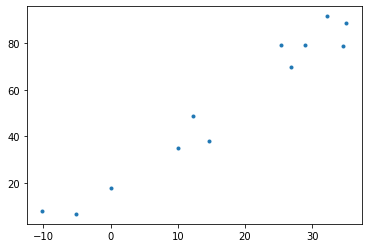

In [3]:
plt.plot(temp,icecream,'.')

- 온도와 아이스크림 판매량의 산점도 

`-` 소아마비 = 30 + 온도 $\times$ 0.5 + $\epsilon^*$

In [4]:
np.random.seed(2) 
ϵ2= np.random.normal(size=12,scale=5) 
disease = 30+ temp* 0.5 + ϵ2

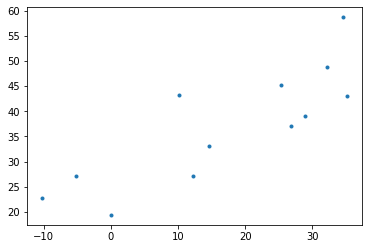

In [5]:
plt.plot(temp,disease,'.')

- 온도와 소아마비의 산점도 

`-` 아이스크림과 질병의 산점도를 그려보자. 

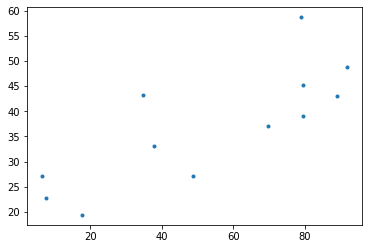

In [6]:
plt.plot(icecream,disease,'.')

- 양의 상관관계에 있다. 

`-` 아이스크림 중 어떠한 물질이 소아마비를 일으키는것이 분명하므로 (인과성이 분명해보이니까) 아래와 같은 모형을 세우자. <-- 여기서부터 틀렸음 

$${\tt disease}_i =\beta_0 +\beta_1 {\tt icecream}_i +\epsilon_i,\quad \textbf{for} ~~ i=1,2,\dots, 12$$

`-` 적절한 $\beta_0$와 $\beta_1$을 추정하면 우리는 아이스크림과 소아마비의 관계를 알 수 있다. <-- 틀린주장 
- 틀린 모형 
- 도데체 우리가 뭘 잘못했는가? 

`-` 두 변수 사이에 상관관계가 있어도 실제 원인은 다른 변수에 숨겨져 있는 경우가 많다. 

- 예제의상황: 아이스크림과 익사자도 양의 상관관계에 있을것이다. 
- 아이스크림을 먹이면 물에 빠져 죽는다 $\to$ 틀린주장 
- 사실 기온이 숨겨진 원인이다. 기온이 증가하면 아이스크림 판매량도 증가하고 폭염때문에 익사사고율도 높아지는 구조이다. 

`-` 아래와 같은 예제를 생각하자. 

- 인구수 $\to$ 교회 
- 인구수 $\to$ 범죄건수 
- 지역별 교회와 범죄건수를 살펴보면 상관관계가 높게 나올것임 


`-` 교회를 많이 지으면 범죄건수도 증가한다? 
- 사실 그렇지 않다. 
- 인구수가 비슷한 도시끼리 묶어서 비교해보면 교회와 범죄건수는 양의 상관관계에 있지 않을것임 

`-` 올바른 분석: 온도가 비슷한 그룹끼리 묶어서 그려보자. $\to$ 상관계수가 줄어들 것이다. 

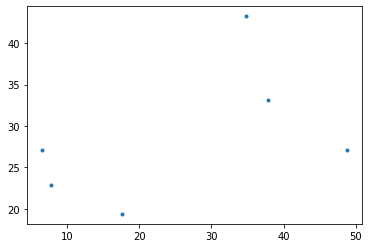

In [7]:
plt.plot(icecream[:6],disease[:6],'.')

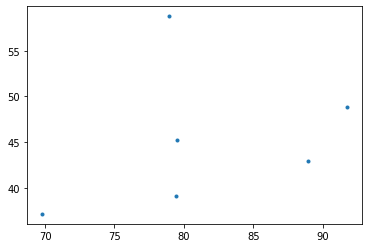

In [8]:
plt.plot(icecream[6:],disease[6:],'.')

`-` 진짜로 선형관계가 약해졌다.. 

### 좀 더 그럴듯한 자료 

`-` 위의 toy example은 데이터가 너무 작아서 억지스러움 

In [9]:
df=pd.read_csv('https://raw.githubusercontent.com/guebin/2021DV/master/_notebooks/extremum.csv')

In [10]:
df

,지점번호,지점명,일시,평균기온(℃),최고기온(℃),최고기온시각,최저기온(℃),최저기온시각일교차,Unnamed: 8
0,146,전주,2020-01-01,-0.5,4.3,15:09,-6.4,1:42,10.7
1,146,전주,2020-01-02,1.4,6.5,14:12,-3.0,7:55,9.5
2,146,전주,2020-01-03,2.6,7.6,13:32,-0.5,23:53,8.1
3,146,전주,2020-01-04,2.0,7.7,13:51,-2.6,5:30,10.3
4,146,전주,2020-01-05,2.5,8.6,14:05,-3.2,7:36,11.8
...,...,...,...,...,...,...,...,...,...
651,146,전주,2021-10-13,19.9,25.5,14:29,15.6,3:49,9.9
652,146,전주,2021-10-14,20.4,25.5,13:36,17.0,6:15,8.5
653,146,전주,2021-10-15,18.3,22.0,13:47,15.7,4:48,6.3
654,146,전주,2021-10-16,12.8,17.4,0:01,6.5,23:31,10.9


`-` 평균기온만 선택하여 뽑자. 

In [11]:
pd.Series(df.columns)

0          지점번호
1           지점명
2            일시
3       평균기온(℃)
4       최고기온(℃)
5        최고기온시각
6       최저기온(℃)
7     최저기온시각일교차
8    Unnamed: 8
dtype: object

In [12]:
temp=np.array(df.iloc[:,3])

In [13]:
len(temp)

656

`-` 아이스크림 판매량 

In [14]:
np.random.seed(1)
ϵ1=np.random.normal(size=656, scale=10) 
icecream=temp*2 + 30 + ϵ1 

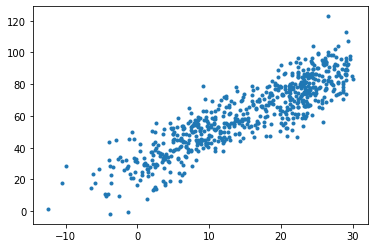

In [15]:
plt.plot(temp,icecream,'.')

`-` 소아마비

In [16]:
np.random.seed(2) 
ϵ2=np.random.normal(size=656,scale=1)
disease=temp*0.5 + 40 +ϵ2

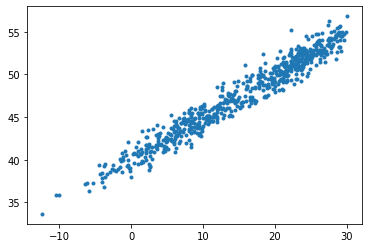

In [17]:
plt.plot(temp,disease,'.')

`-` 아이스크림과 소아마비

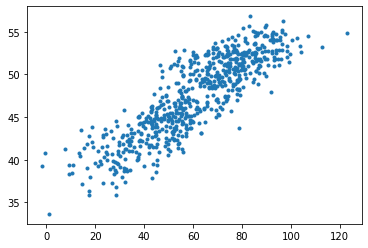

In [18]:
plt.plot(icecream,disease,'.')

In [19]:
np.corrcoef(icecream,disease)

array([[1.        , 0.86298975],
       [0.86298975, 1.        ]])

- 0.86정도.. 

`-` 여름만 뽑아서 그러보면? 

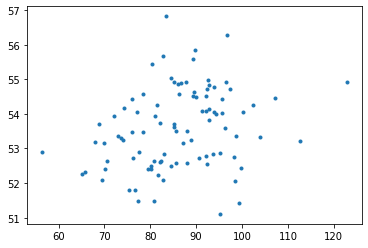

In [20]:
plt.plot(icecream[temp>25],disease[temp>25], '.') ## 평균기온이 25도가 넘어가면 여름

`-` 산점도 

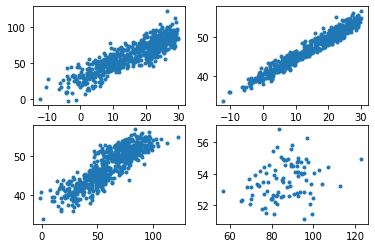

In [21]:
fig , ((ax1,ax2), (ax3,ax4)) = plt.subplots(2,2) 
ax1.plot(temp,icecream,'.')
ax2.plot(temp,disease,'.')
ax3.plot(icecream,disease,'.')
ax4.plot(icecream[temp>25],disease[temp>25],'.')

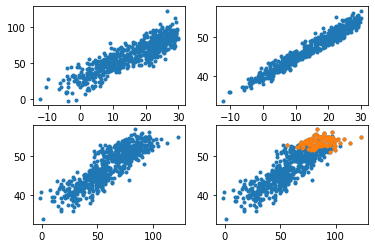

In [22]:
fig , ((ax1,ax2), (ax3,ax4)) = plt.subplots(2,2) 
ax1.plot(temp,icecream,'.')
ax2.plot(temp,disease,'.')
ax3.plot(icecream,disease,'.')
ax4.plot(icecream,disease,'.')
ax4.plot(icecream[temp>25],disease[temp>25],'.')

### 온도구간을 세분화 하여 시각화 

`-` 목표: 모든 온도구간에 대하여 각각 색을 다르게 하여 그려보자. 

- 사실 지금 변수는 온도, 아이스크림판매량, 소아마비 
- 지금까지는 기본산점도만 사용하였기에 2차원플랏만 그렸음 $\to$ 그래서 각각의 산점도를 정신없이 그려왔음 
- 온도가 유사한 지역을 색으로 묶으면 3차원 플랏이 가능함 

`-` 일단 데이터 프레임을 정리하자. 

In [23]:
df1=pd.DataFrame({'temp':temp, 'icecream':icecream, 'disease':disease})

In [24]:
df1

,temp,icecream,disease
0,-0.5,45.243454,39.333242
1,1.4,26.682436,40.643733
2,2.6,29.918282,39.163804
3,2.0,23.270314,42.640271
4,2.5,43.654076,39.456564
...,...,...,...
651,19.9,78.839992,49.633906
652,20.4,86.554679,48.920443
653,18.3,78.666079,49.882650
654,12.8,52.771364,46.613159


`-` 온도를 카테고리화 하자 $\to$ 적당한 구긴을 설정하기 위해서 히스토그램을 그려보자. 

<AxesSubplot:>

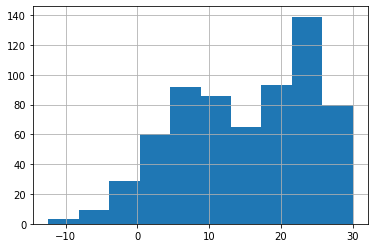

In [25]:
df1.temp.hist()

(array([  3.,   9.,  29.,  60.,  92.,  86.,  65.,  93., 139.,  80.]),
 array([-12.4 ,  -8.16,  -3.92,   0.32,   4.56,   8.8 ,  13.04,  17.28,
         21.52,  25.76,  30.  ]),
 <BarContainer object of 10 artists>)

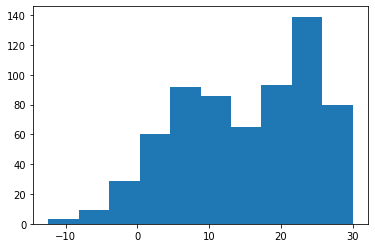

In [26]:
plt.hist(df1.temp)

`-` 구간은 5정도로 하면 적당할것 같다. 

In [27]:
def f(x): 
    if x<0: 
        y='group0'
    elif x<5: 
        y='group5'
    elif x<10: 
        y='group10'
    elif x<15: 
        y='group15'
    elif x<20:
        y='group20'
    elif x<25: 
        y='group25'
    else: 
        y='group30'
    return y 

In [28]:
df1['temp2']=list(map(f,df1.temp))

In [29]:
df1

,temp,icecream,disease,temp2
0,-0.5,45.243454,39.333242,group0
1,1.4,26.682436,40.643733,group5
2,2.6,29.918282,39.163804,group5
3,2.0,23.270314,42.640271,group5
4,2.5,43.654076,39.456564,group5
...,...,...,...,...
651,19.9,78.839992,49.633906,group20
652,20.4,86.554679,48.920443,group25
653,18.3,78.666079,49.882650,group20
654,12.8,52.771364,46.613159,group15


In [30]:
from plotnine import * 

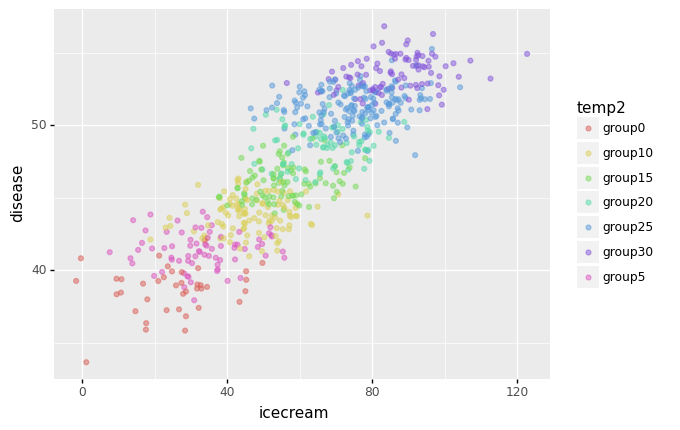

<ggplot: (8775324161780)>

In [31]:
ggplot(data=df1)+geom_point(aes(x='icecream',y='disease',colour='temp2'),alpha=0.5)

/Users/honghyeonki/opt/anaconda3/envs/ds2021/lib/python3.8/site-packages/plotnine/stats/smoothers.py:310: PlotnineWarning: Confidence intervals are not yet implementedfor lowess smoothings.
/Users/honghyeonki/opt/anaconda3/envs/ds2021/lib/python3.8/site-packages/plotnine/stats/smoothers.py:310: PlotnineWarning: Confidence intervals are not yet implementedfor lowess smoothings.
/Users/honghyeonki/opt/anaconda3/envs/ds2021/lib/python3.8/site-packages/plotnine/stats/smoothers.py:310: PlotnineWarning: Confidence intervals are not yet implementedfor lowess smoothings.
/Users/honghyeonki/opt/anaconda3/envs/ds2021/lib/python3.8/site-packages/plotnine/stats/smoothers.py:310: PlotnineWarning: Confidence intervals are not yet implementedfor lowess smoothings.
/Users/honghyeonki/opt/anaconda3/envs/ds2021/lib/python3.8/site-packages/plotnine/stats/smoothers.py:310: PlotnineWarning: Confidence intervals are not yet implementedfor lowess smoothings.
/Users/honghyeonki/opt/anaconda3/envs/ds2021/lib/p

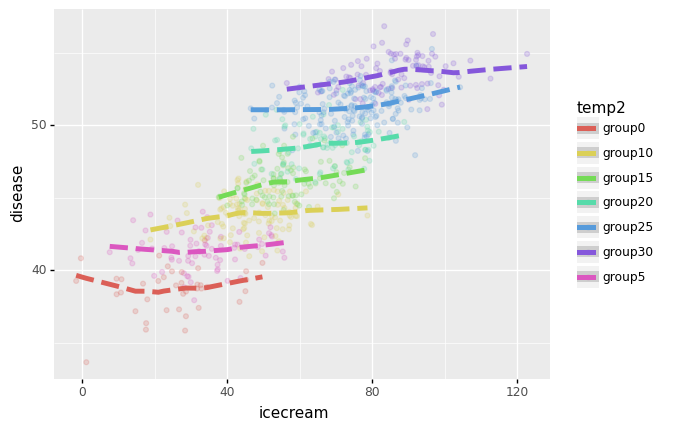

<ggplot: (8775320499821)>

In [32]:
ggplot(data=df1)+geom_point(aes(x='icecream',y='disease',colour='temp2'),alpha=0.2)+geom_smooth(aes(x='icecream',y='disease',colour='temp2'),size=2,linetype='dashed')

`-` 온도를 통제하니까 아이스크림과 질병은 관련이 없어보인다. 

### 진짜 만약에 아이스크림과 소아마비가 관련있는 경우라면? 

In [33]:
np.random.seed(1)
ϵ1=np.random.normal(size=656, scale=10) 
icecream=temp*2 + 30 + ϵ1 

In [34]:
np.random.seed(2) 
ϵ2=np.random.normal(size=656,scale=1)
disease= 30+ temp*0.0 + icecream*0.15 +ϵ2*2

In [35]:
df2=pd.DataFrame({'temp':temp,'icecream':icecream,'disease':disease})
df2['temp2']=list(map(f,df2.temp))

In [36]:
df2

,temp,icecream,disease,temp2
0,-0.5,45.243454,35.953002,group0
1,1.4,26.682436,33.889832,group5
2,2.6,29.918282,30.215350,group5
3,2.0,23.270314,36.771089,group5
4,2.5,43.654076,32.961240,group5
...,...,...,...,...
651,19.9,78.839992,41.193811,group20
652,20.4,86.554679,40.424088,group25
653,18.3,78.666079,43.265212,group20
654,12.8,52.771364,38.342022,group15


/Users/honghyeonki/opt/anaconda3/envs/ds2021/lib/python3.8/site-packages/plotnine/stats/smoothers.py:310: PlotnineWarning: Confidence intervals are not yet implementedfor lowess smoothings.
/Users/honghyeonki/opt/anaconda3/envs/ds2021/lib/python3.8/site-packages/plotnine/stats/smoothers.py:310: PlotnineWarning: Confidence intervals are not yet implementedfor lowess smoothings.
/Users/honghyeonki/opt/anaconda3/envs/ds2021/lib/python3.8/site-packages/plotnine/stats/smoothers.py:310: PlotnineWarning: Confidence intervals are not yet implementedfor lowess smoothings.
/Users/honghyeonki/opt/anaconda3/envs/ds2021/lib/python3.8/site-packages/plotnine/stats/smoothers.py:310: PlotnineWarning: Confidence intervals are not yet implementedfor lowess smoothings.
/Users/honghyeonki/opt/anaconda3/envs/ds2021/lib/python3.8/site-packages/plotnine/stats/smoothers.py:310: PlotnineWarning: Confidence intervals are not yet implementedfor lowess smoothings.
/Users/honghyeonki/opt/anaconda3/envs/ds2021/lib/p

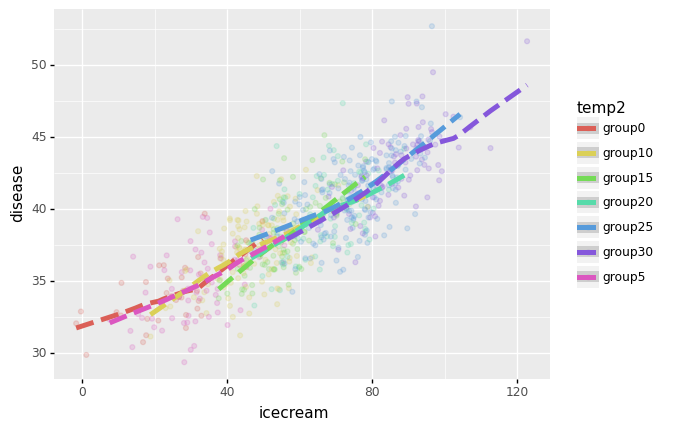

<ggplot: (8775324500215)>

In [37]:
ggplot(data=df2)+geom_point(aes(x='icecream',y='disease',colour='temp2'),alpha=0.2)+geom_smooth(aes(x='icecream',y='disease',colour='temp2'),size=2,linetype='dashed')

In [38]:
df1.corr()

,temp,icecream,disease
temp,1.000000,0.884366,0.975609
icecream,0.884366,1.000000,0.862990
disease,0.975609,0.862990,1.000000


In [39]:
df2.corr()

,temp,icecream,disease
temp,1.000000,0.884366,0.725505
icecream,0.884366,1.000000,0.830539
disease,0.725505,0.830539,1.000000


### 숙제 

`-` 온도구간을 10으로 변경하고 df1, df2에서 아이스크림과 소아마비의 산점도를 시각화한뒤 스크린샷 제출 

In [40]:
def f(x): 
    if x<0: 
        y='group0'
    elif x<10: 
        y='group10'
    elif x<20:
        y='group20'
    else: 
        y='group30'
    return y 

In [41]:
df1['temp3']=list(map(f,df1.temp))

In [42]:
df1

,temp,icecream,disease,temp2,temp3
0,-0.5,45.243454,39.333242,group0,group0
1,1.4,26.682436,40.643733,group5,group10
2,2.6,29.918282,39.163804,group5,group10
3,2.0,23.270314,42.640271,group5,group10
4,2.5,43.654076,39.456564,group5,group10
...,...,...,...,...,...
651,19.9,78.839992,49.633906,group20,group20
652,20.4,86.554679,48.920443,group25,group30
653,18.3,78.666079,49.882650,group20,group20
654,12.8,52.771364,46.613159,group15,group20


/Users/honghyeonki/opt/anaconda3/envs/ds2021/lib/python3.8/site-packages/plotnine/stats/smoothers.py:310: PlotnineWarning: Confidence intervals are not yet implementedfor lowess smoothings.
/Users/honghyeonki/opt/anaconda3/envs/ds2021/lib/python3.8/site-packages/plotnine/stats/smoothers.py:310: PlotnineWarning: Confidence intervals are not yet implementedfor lowess smoothings.
/Users/honghyeonki/opt/anaconda3/envs/ds2021/lib/python3.8/site-packages/plotnine/stats/smoothers.py:310: PlotnineWarning: Confidence intervals are not yet implementedfor lowess smoothings.
/Users/honghyeonki/opt/anaconda3/envs/ds2021/lib/python3.8/site-packages/plotnine/stats/smoothers.py:310: PlotnineWarning: Confidence intervals are not yet implementedfor lowess smoothings.


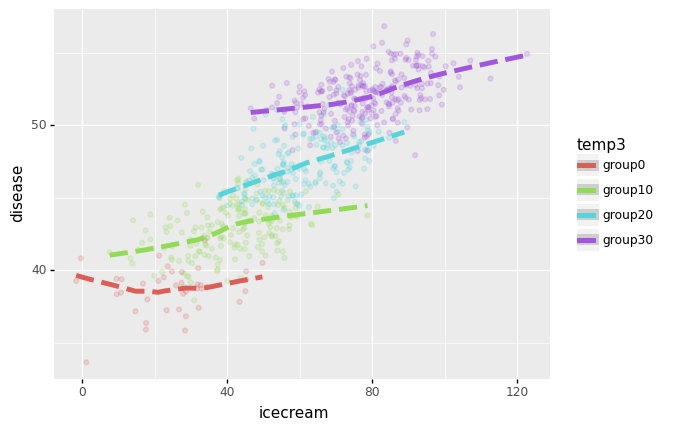

<ggplot: (8775319828661)>

In [43]:
ggplot(data=df1)+geom_point(aes(x='icecream', y='disease', colour = 'temp3'),alpha=0.2)+geom_smooth(aes(x='icecream', y='disease', colour = 'temp3'), size = 2, linetype = 'dashed')

In [44]:
df2['temp3']=list(map(f,df2.temp))

In [45]:
df2

,temp,icecream,disease,temp2,temp3
0,-0.5,45.243454,35.953002,group0,group0
1,1.4,26.682436,33.889832,group5,group10
2,2.6,29.918282,30.215350,group5,group10
3,2.0,23.270314,36.771089,group5,group10
4,2.5,43.654076,32.961240,group5,group10
...,...,...,...,...,...
651,19.9,78.839992,41.193811,group20,group20
652,20.4,86.554679,40.424088,group25,group30
653,18.3,78.666079,43.265212,group20,group20
654,12.8,52.771364,38.342022,group15,group20


/Users/honghyeonki/opt/anaconda3/envs/ds2021/lib/python3.8/site-packages/plotnine/stats/smoothers.py:310: PlotnineWarning: Confidence intervals are not yet implementedfor lowess smoothings.
/Users/honghyeonki/opt/anaconda3/envs/ds2021/lib/python3.8/site-packages/plotnine/stats/smoothers.py:310: PlotnineWarning: Confidence intervals are not yet implementedfor lowess smoothings.
/Users/honghyeonki/opt/anaconda3/envs/ds2021/lib/python3.8/site-packages/plotnine/stats/smoothers.py:310: PlotnineWarning: Confidence intervals are not yet implementedfor lowess smoothings.
/Users/honghyeonki/opt/anaconda3/envs/ds2021/lib/python3.8/site-packages/plotnine/stats/smoothers.py:310: PlotnineWarning: Confidence intervals are not yet implementedfor lowess smoothings.


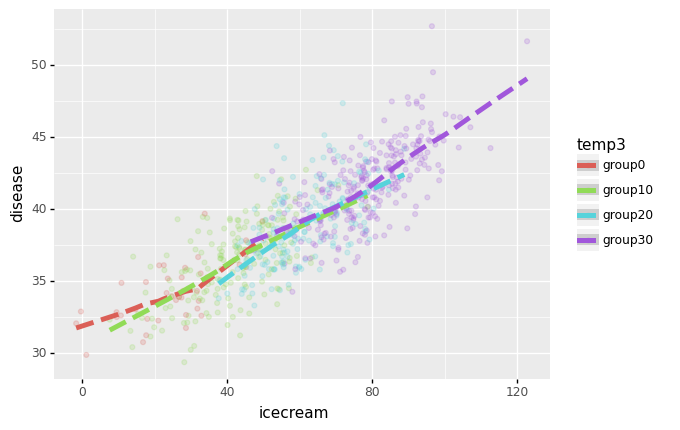

<ggplot: (8775324559074)>

In [46]:
ggplot(data=df2)+geom_point(aes(x='icecream', y='disease', colour = 'temp3'),alpha=0.2)+geom_smooth(aes(x='icecream', y='disease', colour = 'temp3'), size = 2, linetype = 'dashed')

## 행을 선택하는 방법 

### 첫번째 행을 선택하는 법 

In [47]:
np.random.seed(1)
dic= {'X1':np.random.normal(0,1,5), 
      'X2':np.random.normal(0,1,5), 
      'X3':np.random.normal(0,1,5), 
      'X4':np.random.normal(0,1,5), 
      'X5':np.random.normal(0,1,5), 
      'X6':np.random.normal(0,1,5)}
df1=pd.DataFrame(dic)
df1

,X1,X2,X3,X4,X5,X6
0,1.624345,-2.301539,1.462108,-1.099891,-1.100619,-0.683728
1,-0.611756,1.744812,-2.060141,-0.172428,1.144724,-0.122890
2,-0.528172,-0.761207,-0.322417,-0.877858,0.901591,-0.935769
3,-1.072969,0.319039,-0.384054,0.042214,0.502494,-0.267888
4,0.865408,-0.249370,1.133769,0.582815,0.900856,0.530355


`-` 방법1

In [48]:
df1.iloc[0] # 이상해 

X1    1.624345
X2   -2.301539
X3    1.462108
X4   -1.099891
X5   -1.100619
X6   -0.683728
Name: 0, dtype: float64

`-` 방법2

In [49]:
df1.iloc[[0]]

,X1,X2,X3,X4,X5,X6
0,1.624345,-2.301539,1.462108,-1.099891,-1.100619,-0.683728


`-` 방법3

In [50]:
df1.iloc[0,:]

X1    1.624345
X2   -2.301539
X3    1.462108
X4   -1.099891
X5   -1.100619
X6   -0.683728
Name: 0, dtype: float64

`-` 방법4

In [51]:
df1.iloc[[0],:]

,X1,X2,X3,X4,X5,X6
0,1.624345,-2.301539,1.462108,-1.099891,-1.100619,-0.683728


`-` 방법5

In [52]:
df1.loc[0] # 이상해 

X1    1.624345
X2   -2.301539
X3    1.462108
X4   -1.099891
X5   -1.100619
X6   -0.683728
Name: 0, dtype: float64

`-` 방법6

In [53]:
df1.loc[[0]]

,X1,X2,X3,X4,X5,X6
0,1.624345,-2.301539,1.462108,-1.099891,-1.100619,-0.683728


`-` 방법7

In [54]:
df1.loc[0,:]

X1    1.624345
X2   -2.301539
X3    1.462108
X4   -1.099891
X5   -1.100619
X6   -0.683728
Name: 0, dtype: float64

`-` 방법8

In [55]:
df1.loc[[0],:]

,X1,X2,X3,X4,X5,X6
0,1.624345,-2.301539,1.462108,-1.099891,-1.100619,-0.683728


`-` 방법9 

In [56]:
df1.iloc[[True,False,False,False,False]]

,X1,X2,X3,X4,X5,X6
0,1.624345,-2.301539,1.462108,-1.099891,-1.100619,-0.683728


`-` 방법10

In [57]:
df1.iloc[[True,False,False,False,False],:]

,X1,X2,X3,X4,X5,X6
0,1.624345,-2.301539,1.462108,-1.099891,-1.100619,-0.683728


`-` 방법11

In [58]:
df1.loc[[True,False,False,False,False]]

,X1,X2,X3,X4,X5,X6
0,1.624345,-2.301539,1.462108,-1.099891,-1.100619,-0.683728


`-` 방법12

In [59]:
df1.loc[[True,False,False,False,False],:]

,X1,X2,X3,X4,X5,X6
0,1.624345,-2.301539,1.462108,-1.099891,-1.100619,-0.683728


### 1,3행을 선택하는 방법 

In [60]:
df1

,X1,X2,X3,X4,X5,X6
0,1.624345,-2.301539,1.462108,-1.099891,-1.100619,-0.683728
1,-0.611756,1.744812,-2.060141,-0.172428,1.144724,-0.122890
2,-0.528172,-0.761207,-0.322417,-0.877858,0.901591,-0.935769
3,-1.072969,0.319039,-0.384054,0.042214,0.502494,-0.267888
4,0.865408,-0.249370,1.133769,0.582815,0.900856,0.530355


`-` 방법1

In [61]:
df1.iloc[[0,2],:]

,X1,X2,X3,X4,X5,X6
0,1.624345,-2.301539,1.462108,-1.099891,-1.100619,-0.683728
2,-0.528172,-0.761207,-0.322417,-0.877858,0.901591,-0.935769


`-` 방법2

In [62]:
df1.loc[[0,2],:]

,X1,X2,X3,X4,X5,X6
0,1.624345,-2.301539,1.462108,-1.099891,-1.100619,-0.683728
2,-0.528172,-0.761207,-0.322417,-0.877858,0.901591,-0.935769


`-` 그외에 여러행을 뽑는 방법이 있음; 슬라이싱, 불인덱싱 

#### loc vs iloc ?? 

`-` 인덱스가 정수가 아닌경우 

In [63]:
_df= pd.DataFrame({'A':[1,2,3,4],'B':[4,5,6,7]},index=list('abcd'))
_df

,A,B
a,1,4
b,2,5
c,3,6
d,4,7


In [64]:
_df.loc['a':'c',:]

,A,B
a,1,4
b,2,5
c,3,6


In [65]:
_df.iloc[0:3,:]

,A,B
a,1,4
b,2,5
c,3,6


In [66]:
_df.loc[['a','b','c'],:]

,A,B
a,1,4
b,2,5
c,3,6


In [67]:
_df.iloc[[0,1,2],:]

,A,B
a,1,4
b,2,5
c,3,6


`-` 대부분의 경우 observation에 특정한 이름이 있는 경우는 없으므로 loc이 그다지 쓸모 없음 

`-` 그렇지만 특정경우에는 쓸모가 있음 

In [68]:
np.random.normal(size=(20,4))

array([[-0.69166075, -0.39675353, -0.6871727 , -0.84520564],
       [-0.67124613, -0.0126646 , -1.11731035,  0.2344157 ],
       [ 1.65980218,  0.74204416, -0.19183555, -0.88762896],
       [-0.74715829,  1.6924546 ,  0.05080775, -0.63699565],
       [ 0.19091548,  2.10025514,  0.12015895,  0.61720311],
       [ 0.30017032, -0.35224985, -1.1425182 , -0.34934272],
       [-0.20889423,  0.58662319,  0.83898341,  0.93110208],
       [ 0.28558733,  0.88514116, -0.75439794,  1.25286816],
       [ 0.51292982, -0.29809284,  0.48851815, -0.07557171],
       [ 1.13162939,  1.51981682,  2.18557541, -1.39649634],
       [-1.44411381, -0.50446586,  0.16003707,  0.87616892],
       [ 0.31563495, -2.02220122, -0.30620401,  0.82797464],
       [ 0.23009474,  0.76201118, -0.22232814, -0.20075807],
       [ 0.18656139,  0.41005165,  0.19829972,  0.11900865],
       [-0.67066229,  0.37756379,  0.12182127,  1.12948391],
       [ 1.19891788,  0.18515642, -0.37528495, -0.63873041],
       [ 0.42349435,  0.

In [69]:
np.random.seed(1)
_df= pd.DataFrame(np.random.normal(size=(20,4)), columns=list('ABCD'), index=pd.date_range('20201225',periods=20))
_df

,A,B,C,D
2020-12-25,1.624345,-0.611756,-0.528172,-1.072969
2020-12-26,0.865408,-2.301539,1.744812,-0.761207
2020-12-27,0.319039,-0.249370,1.462108,-2.060141
2020-12-28,-0.322417,-0.384054,1.133769,-1.099891
2020-12-29,-0.172428,-0.877858,0.042214,0.582815
2020-12-30,-1.100619,1.144724,0.901591,0.502494
2020-12-31,0.900856,-0.683728,-0.122890,-0.935769
2021-01-01,-0.267888,0.530355,-0.691661,-0.396754
2021-01-02,-0.687173,-0.845206,-0.671246,-0.012665
2021-01-03,-1.117310,0.234416,1.659802,0.742044


`-` 1월5일부터 1월8일까지의 자료만 보고싶다. 

In [70]:
_df.loc['20210105':'20210108']

,A,B,C,D
2021-01-05,0.050808,-0.636996,0.190915,2.100255
2021-01-06,0.120159,0.617203,0.300170,-0.352250
2021-01-07,-1.142518,-0.349343,-0.208894,0.586623
2021-01-08,0.838983,0.931102,0.285587,0.885141


`-` iloc으로 하려면 힘들다. 

In [71]:
_df.index

DatetimeIndex(['2020-12-25', '2020-12-26', '2020-12-27', '2020-12-28',
               '2020-12-29', '2020-12-30', '2020-12-31', '2021-01-01',
               '2021-01-02', '2021-01-03', '2021-01-04', '2021-01-05',
               '2021-01-06', '2021-01-07', '2021-01-08', '2021-01-09',
               '2021-01-10', '2021-01-11', '2021-01-12', '2021-01-13'],
              dtype='datetime64[ns]', freq='D')

In [72]:
pd.Series(_df.index)

0    2020-12-25
1    2020-12-26
2    2020-12-27
3    2020-12-28
4    2020-12-29
5    2020-12-30
6    2020-12-31
7    2021-01-01
8    2021-01-02
9    2021-01-03
10   2021-01-04
11   2021-01-05
12   2021-01-06
13   2021-01-07
14   2021-01-08
15   2021-01-09
16   2021-01-10
17   2021-01-11
18   2021-01-12
19   2021-01-13
dtype: datetime64[ns]

In [73]:
_df.iloc[11:15]

,A,B,C,D
2021-01-05,0.050808,-0.636996,0.190915,2.100255
2021-01-06,0.120159,0.617203,0.300170,-0.352250
2021-01-07,-1.142518,-0.349343,-0.208894,0.586623
2021-01-08,0.838983,0.931102,0.285587,0.885141


#### 자주하는 실수 

`-` 저는 아래와 같은 실수를 자주해요 

In [74]:
_df.loc['A']

KeyError: 'A'

`-` 올바른 방법

In [75]:
_df['A']

2020-12-25    1.624345
2020-12-26    0.865408
2020-12-27    0.319039
2020-12-28   -0.322417
2020-12-29   -0.172428
2020-12-30   -1.100619
2020-12-31    0.900856
2021-01-01   -0.267888
2021-01-02   -0.687173
2021-01-03   -1.117310
2021-01-04   -0.191836
2021-01-05    0.050808
2021-01-06    0.120159
2021-01-07   -1.142518
2021-01-08    0.838983
2021-01-09   -0.754398
2021-01-10    0.488518
2021-01-11    2.185575
2021-01-12    0.160037
2021-01-13   -0.306204
Freq: D, Name: A, dtype: float64

`-` 아래의 사실을 기억하자. 

- 기본적으로는 iloc, loc은 `[2], [2:]` 처럼 1차원으로 원소를 인덱싱할수도 있고, `[2,3], [:,2]` 와 같이 2차원으로 인덱싱할 수도 있다. 

- 1차원으로 인덱싱하는 경우는 기본적으로 행을 인덱싱한다 $\to$ **iloc, loc은 행과 더 친하고 열과 친하지 않다.** 

- 따라서 열을 선택하는 방법에 있어서 loc, iloc이 그렇제 좋은 방법은 아니다. 

- 그렇지만 열을 선택하는 방법은 iloc이나 loc이 제일 편리하다. (이외의 다른 방법이 마땅하게 없음) 그래서 열을 선택할때도 iloc이나 loc을 선호한다. 

### 슬라이싱에 대한 응용 

In [76]:
_df.iloc[::2]

,A,B,C,D
2020-12-25,1.624345,-0.611756,-0.528172,-1.072969
2020-12-27,0.319039,-0.249370,1.462108,-2.060141
2020-12-29,-0.172428,-0.877858,0.042214,0.582815
2020-12-31,0.900856,-0.683728,-0.122890,-0.935769
2021-01-02,-0.687173,-0.845206,-0.671246,-0.012665
2021-01-04,-0.191836,-0.887629,-0.747158,1.692455
2021-01-06,0.120159,0.617203,0.300170,-0.352250
2021-01-08,0.838983,0.931102,0.285587,0.885141
2021-01-10,0.488518,-0.075572,1.131629,1.519817
2021-01-12,0.160037,0.876169,0.315635,-2.022201


`-` 이 방법은 칼럼에도 적용가능 

In [77]:
_df.iloc[:,::2]

,A,C
2020-12-25,1.624345,-0.528172
2020-12-26,0.865408,1.744812
2020-12-27,0.319039,1.462108
2020-12-28,-0.322417,1.133769
2020-12-29,-0.172428,0.042214
2020-12-30,-1.100619,0.901591
2020-12-31,0.900856,-0.122890
2021-01-01,-0.267888,-0.691661
2021-01-02,-0.687173,-0.671246
2021-01-03,-1.117310,1.659802


`-` 칼럼에는 잘 쓰지 않는이유? 

- row는 특정간격으로 뽑는 일이 빈번함. (예를들어 일별데이터를 주별데이터로 바꾸고싶을때, 바꾸고 싶을 경우?) 

- col을 특정간격으로 뽑아야 하는 일은 없음 

### lambda + map 

In [78]:
np.random.seed(1)
df2= pd.DataFrame(np.random.normal(size=(10,4)),columns=list('ABCD'))
df2

,A,B,C,D
0,1.624345,-0.611756,-0.528172,-1.072969
1,0.865408,-2.301539,1.744812,-0.761207
2,0.319039,-0.249370,1.462108,-2.060141
3,-0.322417,-0.384054,1.133769,-1.099891
4,-0.172428,-0.877858,0.042214,0.582815
5,-1.100619,1.144724,0.901591,0.502494
6,0.900856,-0.683728,-0.122890,-0.935769
7,-0.267888,0.530355,-0.691661,-0.396754
8,-0.687173,-0.845206,-0.671246,-0.012665
9,-1.117310,0.234416,1.659802,0.742044


#### 칼럼A의 값이 0보다 큰 경우만 

`-` 방법1

In [79]:
df2.loc[map(lambda x: x>0,df2['A']),:]

,A,B,C,D
0,1.624345,-0.611756,-0.528172,-1.072969
1,0.865408,-2.301539,1.744812,-0.761207
2,0.319039,-0.249370,1.462108,-2.060141
6,0.900856,-0.683728,-0.122890,-0.935769


`-` 방법2

In [80]:
df2.loc[lambda df: df['A']>0,:]

,A,B,C,D
0,1.624345,-0.611756,-0.528172,-1.072969
1,0.865408,-2.301539,1.744812,-0.761207
2,0.319039,-0.249370,1.462108,-2.060141
6,0.900856,-0.683728,-0.122890,-0.935769


- ?? 
- map의 기능은 (1) 리스트를 원소별로 분해하여 (2) 어떠한 함수를 적용하여 아웃풋을 구한뒤 (3) 각각의 아웃풋을 다시 하나의 리스트로 묶음 
- 우리는 이중에서 (1),(3)에만 집중했음 
- 하지만 생각해보면 일단 (2) 일단 함수를 적용하는 기능이 있었음 
- 그런데 위의 코든느 함수를 적용한 결과가 아니라 함수 오브젝트 자체를 전달하여도 동작함 

**요약!!**
- True, False로 이루어진 벡터를 리스트의 형태로 전달하여 인덱상했음 (원래 우리가 알고 있는 개념) 
- True, False로 이루어진 벡터를 리턴할 수 있는 함수오브젝트 자체를 전달해도 인덱싱이 가능 

`-` 방법3 

In [81]:
df2.iloc[map(lambda x: x>0,df2['A']),:]

,A,B,C,D
0,1.624345,-0.611756,-0.528172,-1.072969
1,0.865408,-2.301539,1.744812,-0.761207
2,0.319039,-0.249370,1.462108,-2.060141
6,0.900856,-0.683728,-0.122890,-0.935769


`-` 방법4: 실패

In [82]:
df2.iloc[lambda df: df['A']>0,:]

NotImplementedError: iLocation based boolean indexing on an integer type is not available

- 위에서 iloc을 loc으로 바꾸면 되는데.. 
- iloc입장에서는 조금 서운함 

#### 칼럼A>0 이고 칼럼C<0 인 경우 

In [83]:
df2

,A,B,C,D
0,1.624345,-0.611756,-0.528172,-1.072969
1,0.865408,-2.301539,1.744812,-0.761207
2,0.319039,-0.249370,1.462108,-2.060141
3,-0.322417,-0.384054,1.133769,-1.099891
4,-0.172428,-0.877858,0.042214,0.582815
5,-1.100619,1.144724,0.901591,0.502494
6,0.900856,-0.683728,-0.122890,-0.935769
7,-0.267888,0.530355,-0.691661,-0.396754
8,-0.687173,-0.845206,-0.671246,-0.012665
9,-1.117310,0.234416,1.659802,0.742044


`-` 방법1

In [84]:
df2.loc[map(lambda x,y: x>0 and y<0, df2['A'],df2['C']),:] 

,A,B,C,D
0,1.624345,-0.611756,-0.528172,-1.072969
6,0.900856,-0.683728,-0.122890,-0.935769


`-` 방법2

In [85]:
df2.loc[map(lambda x,y: x>0 & y<0, df2['A'],df2['C']),:] 

TypeError: unsupported operand type(s) for &: 'int' and 'float'

- ??? 아래를 관찰 

***보충학습*** 

In [86]:
0<3.2 &  0<2.2

TypeError: unsupported operand type(s) for &: 'float' and 'int'

In [87]:
(0<3.2) &  (0<2.2)

True

***보충학습끝***

위의코드도 괄호로 묶어주면 잘 동작한다. 

In [88]:
df2.loc[map(lambda x,y: (x>0) & (y<0), df2['A'],df2['C']),:] 

,A,B,C,D
0,1.624345,-0.611756,-0.528172,-1.072969
6,0.900856,-0.683728,-0.122890,-0.935769


`-` 방법3

In [89]:
df2.loc[lambda df: (df['A'] >0) & (df['C']<0)] 

,A,B,C,D
0,1.624345,-0.611756,-0.528172,-1.072969
6,0.900856,-0.683728,-0.122890,-0.935769


**아래는 실행되지 않는다**

In [90]:
df2.loc[lambda df: (df['A'] >0) and (df['C']<0)] 

ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

**실행되지 않는이유**

In [91]:
np.array([True, False]) & np.array([True, True])

array([ True, False])

In [92]:
np.array([True, False]) and np.array([True, True])

ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

`-` iloc을 이용한 방법은 생략 

### query 

In [93]:
import numpy as np 
import pandas as pd

In [94]:
np.random.seed(1)
df=pd.DataFrame(np.random.normal(size=(15,4)),columns=list('ABCD'))
df

,A,B,C,D
0,1.624345,-0.611756,-0.528172,-1.072969
1,0.865408,-2.301539,1.744812,-0.761207
2,0.319039,-0.249370,1.462108,-2.060141
3,-0.322417,-0.384054,1.133769,-1.099891
4,-0.172428,-0.877858,0.042214,0.582815
5,-1.100619,1.144724,0.901591,0.502494
6,0.900856,-0.683728,-0.122890,-0.935769
7,-0.267888,0.530355,-0.691661,-0.396754
8,-0.687173,-0.845206,-0.671246,-0.012665
9,-1.117310,0.234416,1.659802,0.742044


#### A>0 and B<0 인 행을 선택 

`-` 방법1

In [95]:
df.query('A>0 & B<0')

,A,B,C,D
0,1.624345,-0.611756,-0.528172,-1.072969
1,0.865408,-2.301539,1.744812,-0.761207
2,0.319039,-0.249370,1.462108,-2.060141
6,0.900856,-0.683728,-0.122890,-0.935769
11,0.050808,-0.636996,0.190915,2.100255


`-` 방법2

In [96]:
df.query('A>0 and B<0')

,A,B,C,D
0,1.624345,-0.611756,-0.528172,-1.072969
1,0.865408,-2.301539,1.744812,-0.761207
2,0.319039,-0.249370,1.462108,-2.060141
6,0.900856,-0.683728,-0.122890,-0.935769
11,0.050808,-0.636996,0.190915,2.100255


#### A<B<C 인 행을 선택

In [97]:
df.query('A<B<C')

,A,B,C,D
9,-1.117310,0.234416,1.659802,0.742044
13,-1.142518,-0.349343,-0.208894,0.586623


#### A>mean(A) 인 행을 선택

`-` 방법1

In [98]:
df.A.mean()

-0.018839420539994597

In [99]:
df.query('A>-0.018839420539994597')

,A,B,C,D
0,1.624345,-0.611756,-0.528172,-1.072969
1,0.865408,-2.301539,1.744812,-0.761207
2,0.319039,-0.249370,1.462108,-2.060141
6,0.900856,-0.683728,-0.122890,-0.935769
11,0.050808,-0.636996,0.190915,2.100255
12,0.120159,0.617203,0.300170,-0.352250
14,0.838983,0.931102,0.285587,0.885141


`-` 방법2

In [100]:
meanA=df.A.mean()
meanA

-0.018839420539994597

In [101]:
df.query('A> @meanA')

,A,B,C,D
0,1.624345,-0.611756,-0.528172,-1.072969
1,0.865408,-2.301539,1.744812,-0.761207
2,0.319039,-0.249370,1.462108,-2.060141
6,0.900856,-0.683728,-0.122890,-0.935769
11,0.050808,-0.636996,0.190915,2.100255
12,0.120159,0.617203,0.300170,-0.352250
14,0.838983,0.931102,0.285587,0.885141


#### A>mean(A) 이고, A<0.8 인 것을 선택 

`-` 방법1

In [102]:
df.query(' A> @meanA and A<0.8')

,A,B,C,D
2,0.319039,-0.249370,1.462108,-2.060141
11,0.050808,-0.636996,0.190915,2.100255
12,0.120159,0.617203,0.300170,-0.352250


`-` 방법2

In [103]:
df.query(' A> @meanA'
         ' and A<0.8')

,A,B,C,D
2,0.319039,-0.249370,1.462108,-2.060141
11,0.050808,-0.636996,0.190915,2.100255
12,0.120159,0.617203,0.300170,-0.352250


`-` 참고사항: 아래는 에러가 발생한다. 

In [104]:
df.query('A> @meanA'
         'and A<0.8')

SyntaxError: invalid syntax (<unknown>, line 1)

#### 단순인덱싱 

In [105]:
df

,A,B,C,D
0,1.624345,-0.611756,-0.528172,-1.072969
1,0.865408,-2.301539,1.744812,-0.761207
2,0.319039,-0.249370,1.462108,-2.060141
3,-0.322417,-0.384054,1.133769,-1.099891
4,-0.172428,-0.877858,0.042214,0.582815
5,-1.100619,1.144724,0.901591,0.502494
6,0.900856,-0.683728,-0.122890,-0.935769
7,-0.267888,0.530355,-0.691661,-0.396754
8,-0.687173,-0.845206,-0.671246,-0.012665
9,-1.117310,0.234416,1.659802,0.742044


`-` 0, 3:5, 9:11 에 해당하는 row를 뽑고싶다. $\to$ 칼럼이름을 `index`로 받아서 사용한다. 

In [106]:
df.query('index==0 or 3<=index <=5  or 9<=index <=11')

,A,B,C,D
0,1.624345,-0.611756,-0.528172,-1.072969
3,-0.322417,-0.384054,1.133769,-1.099891
4,-0.172428,-0.877858,0.042214,0.582815
5,-1.100619,1.144724,0.901591,0.502494
9,-1.117310,0.234416,1.659802,0.742044
10,-0.191836,-0.887629,-0.747158,1.692455
11,0.050808,-0.636996,0.190915,2.100255


`-` 응용사례1

In [107]:
df.query('index==0 or index ==[8,9,10]')

,A,B,C,D
0,1.624345,-0.611756,-0.528172,-1.072969
8,-0.687173,-0.845206,-0.671246,-0.012665
9,-1.117310,0.234416,1.659802,0.742044
10,-0.191836,-0.887629,-0.747158,1.692455


`-` 응용사례2 

In [108]:
i1= np.arange(3)
i1

array([0, 1, 2])

In [109]:
df.query('index in @i1  or index==5')

,A,B,C,D
0,1.624345,-0.611756,-0.528172,-1.072969
1,0.865408,-2.301539,1.744812,-0.761207
2,0.319039,-0.249370,1.462108,-2.060141
5,-1.100619,1.144724,0.901591,0.502494


`-` 시계열자료에서 특히 유용함 

In [110]:
df2=pd.DataFrame(np.random.normal(size=(10,4)), columns=list('ABCD'), index=pd.date_range('20201226',periods=10))

In [111]:
df2

,A,B,C,D
2020-12-26,-0.754398,1.252868,0.512930,-0.298093
2020-12-27,0.488518,-0.075572,1.131629,1.519817
2020-12-28,2.185575,-1.396496,-1.444114,-0.504466
2020-12-29,0.160037,0.876169,0.315635,-2.022201
2020-12-30,-0.306204,0.827975,0.230095,0.762011
2020-12-31,-0.222328,-0.200758,0.186561,0.410052
2021-01-01,0.198300,0.119009,-0.670662,0.377564
2021-01-02,0.121821,1.129484,1.198918,0.185156
2021-01-03,-0.375285,-0.638730,0.423494,0.077340
2021-01-04,-0.343854,0.043597,-0.620001,0.698032


In [112]:
df2.query(
    ' "2020-12-27"<= index <= "2021-01-03" ')

,A,B,C,D
2020-12-27,0.488518,-0.075572,1.131629,1.519817
2020-12-28,2.185575,-1.396496,-1.444114,-0.504466
2020-12-29,0.160037,0.876169,0.315635,-2.022201
2020-12-30,-0.306204,0.827975,0.230095,0.762011
2020-12-31,-0.222328,-0.200758,0.186561,0.410052
2021-01-01,0.198300,0.119009,-0.670662,0.377564
2021-01-02,0.121821,1.129484,1.198918,0.185156
2021-01-03,-0.375285,-0.638730,0.423494,0.077340


In [113]:
df2.query(
    ' "2020-12-27"<= index <= "2021-01-03" '
    ' and A+B < C')

,A,B,C,D
2020-12-27,0.488518,-0.075572,1.131629,1.519817
2020-12-31,-0.222328,-0.200758,0.186561,0.410052
2021-01-03,-0.375285,-0.638730,0.423494,0.077340


## FIFA 선수들 시각화

### FIFA data 

`-` FIFA22라는 축구게임이 있음 (굉장히 인기있음) 

`-` 게임에 실제 선수들이 나오면서 선수들의 능력치가 세밀하게 구현되어 있음 

`-` 이 능력치에 대한 데이터셋은 캐글에 공개되어 있음 

### Data

In [114]:
fifa22=pd.read_csv('https://raw.githubusercontent.com/guebin/2021DV/master/_notebooks/2021-10-25-FIFA22_official_data.csv')

`-` Overall을 기준으로 정렬하여 보자.

In [115]:
fifa22=fifa22.sort_values(by='Overall',ascending=False).reset_index().rename(columns={'index':'index_old'})

In [116]:
fifa22.head()

,index_old,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,...,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Best Position,Best Overall Rating,Release Clause,DefensiveAwareness
0,29,158023,L. Messi,34,https://cdn.sofifa.com/players/158/023/22_60.png,Argentina,https://cdn.sofifa.com/flags/ar.png,93,93,Paris Saint-Germain,...,24.0,6.0,11.0,15.0,14.0,8.0,RW,93.0,€144.3M,20.0
1,33,188545,R. Lewandowski,32,https://cdn.sofifa.com/players/188/545/22_60.png,Poland,https://cdn.sofifa.com/flags/pl.png,92,92,FC Bayern München,...,19.0,15.0,6.0,12.0,8.0,10.0,ST,92.0,€197.2M,35.0
2,14244,200389,J. Oblak,28,https://cdn.sofifa.com/players/200/389/22_60.png,Slovenia,https://cdn.sofifa.com/flags/si.png,91,93,Atlético de Madrid,...,18.0,87.0,92.0,78.0,90.0,90.0,GK,91.0,€238M,27.0
3,3,192985,K. De Bruyne,30,https://cdn.sofifa.com/players/192/985/22_60.png,Belgium,https://cdn.sofifa.com/flags/be.png,91,91,Manchester City,...,53.0,15.0,13.0,5.0,10.0,13.0,CM,91.0,€232.2M,68.0
4,64,190871,Neymar Jr,29,https://cdn.sofifa.com/players/190/871/22_60.png,Brazil,https://cdn.sofifa.com/flags/br.png,91,91,Paris Saint-Germain,...,29.0,9.0,9.0,15.0,15.0,11.0,LW,91.0,€238.7M,35.0


### Overall vs Potential

In [117]:
from plotnine import *

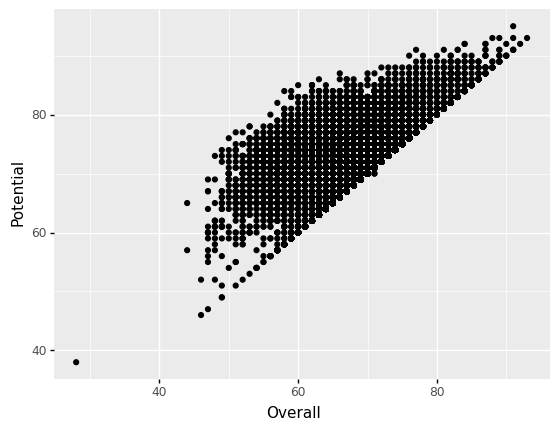

<ggplot: (8775297880754)>

In [118]:
ggplot(data=fifa22)+geom_point(aes(x='Overall', y='Potential'))

`-` 뭔가 Potential > Overall 인 관계가 성립하는것 같다. $\to$ Potetial2= Potential - Overall 인 변수를 새로 만들고 시각화해보자. 
- 판다스: 새로운열 추가

In [119]:
fifa22['Potential2'] = fifa22['Potential'] - fifa22['Overall']

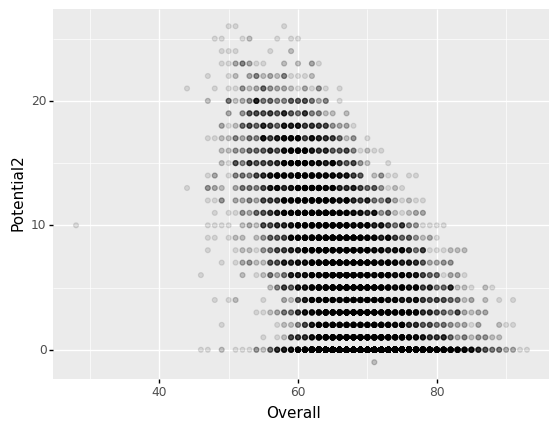

<ggplot: (8775295880759)>

In [120]:
ggplot(data=fifa22)+geom_point(aes(x='Overall', y='Potential2'),alpha=0.1)

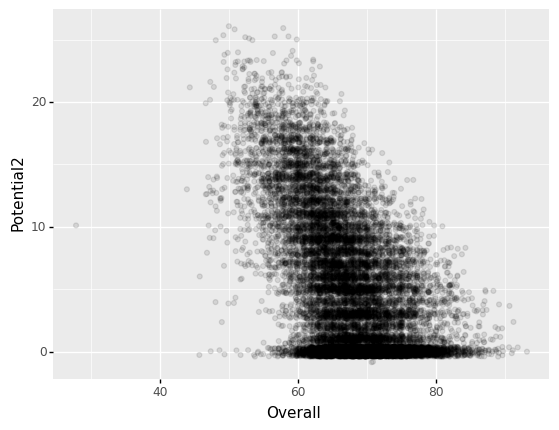

<ggplot: (8775296397668)>

In [121]:
ggplot(data=fifa22)+geom_point(aes(x='Overall', y='Potential2'),alpha=0.1,position='jitter')

`-` 포텐셜2가 너무 0근처인 선수들이 있다. (아마 은퇴한 선수가 아닐까?) $\to$ 제외하고 그리자. 

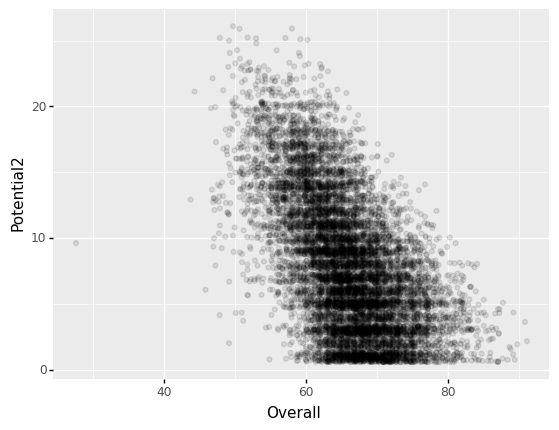

<ggplot: (8775295703209)>

In [122]:
ggplot(data=fifa22.query('Potential2>0.1'))+geom_point(aes(x='Overall', y='Potential2'),alpha=0.1,position='jitter')

`-` 해석 
- 음의 상관관계가 있다. 
- 오버올이 클수록 포텐셜2의 분산이 작아진다. (오버올이 클수록 더 성장할 부분이 없으니까) 

`-` Overall을 구간별로 나누자: 어느정도가 적당한 구간일까? 

In [123]:
fifa22.Overall.describe()

count    16710.000000
mean        67.646320
std          6.457695
min         28.000000
25%         63.000000
50%         68.000000
75%         72.000000
max         93.000000
Name: Overall, dtype: float64

In [124]:
import matplotlib.pyplot as plt 

<AxesSubplot:>

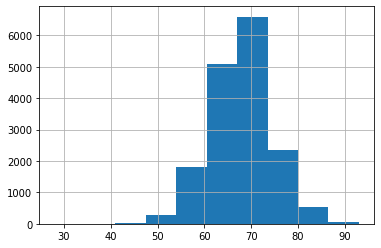

In [125]:
fifa22.Overall.hist()

In [126]:
def f(x): 
    if x>72: y='Q1' 
    elif x>68: y='Q2'
    elif x>63: y='Q3'
    else: y='Q4'
    return y 

In [127]:
fifa22['Q']=list(map(f,fifa22.Overall))
fifa22[['Q','Overall']]

,Q,Overall
0,Q1,93
1,Q1,92
2,Q1,91
3,Q1,91
4,Q1,91
...,...,...
16705,Q4,46
16706,Q4,46
16707,Q4,44
16708,Q4,44


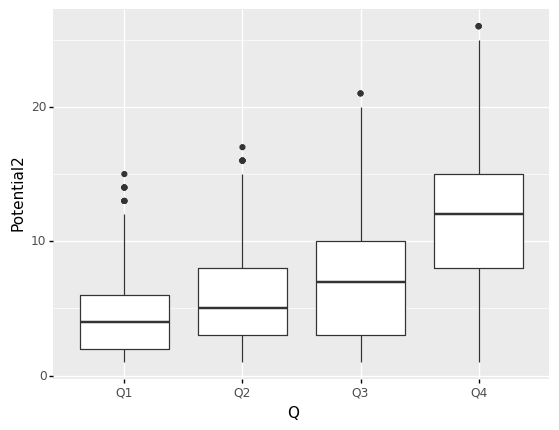

<ggplot: (8775295880259)>

In [128]:
ggplot(data=fifa22.query('Potential2>0.1'))\
+geom_boxplot(aes(x='Q',y='Potential2'))

`-` Q1으로 갈수록 분산이 작아짐! $\to$ 헷갈린다... 

`-` 산점도와 박스플랏을 겹쳐서 그린다면 좀더 이해가 쉬울것 같다. 

`-` x축의 위치를 조정하면 될것 같다 $\to$ Q1, Q2, Q3, Q4 각 그룹별로 x축의 위치를 구하자. 

In [129]:
fifa22.query('Q=="Q1"').Overall.mean()

76.3506528835691

- 이런식으로 해도 되지만 

In [130]:
fifa22.groupby(by='Q').mean().Overall

Q
Q1    76.350653
Q2    70.411781
Q3    66.074449
Q4    59.602691
Name: Overall, dtype: float64

In [131]:
l=fifa22.groupby(by='Q').mean().Overall.to_list()
l

[76.3506528835691, 70.4117807472048, 66.07444942506334, 59.60269121813031]

`-` 이제 박스플랏이 들어갈 x축의 위치를 저장할 컬럼을 추가하고 그 이름을 Qx 라고 하자. 

In [132]:
def g(x): 
    if x=='Q1': y=l[0]
    elif x=='Q2': y=l[1]
    elif x=='Q3': y=l[2]
    else: y=l[3]
    return y

In [133]:
fifa22['Qx']=list(map(g,fifa22.Q))

In [134]:
fifa22

,index_old,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,...,GKKicking,GKPositioning,GKReflexes,Best Position,Best Overall Rating,Release Clause,DefensiveAwareness,Potential2,Q,Qx
0,29,158023,L. Messi,34,https://cdn.sofifa.com/players/158/023/22_60.png,Argentina,https://cdn.sofifa.com/flags/ar.png,93,93,Paris Saint-Germain,...,15.0,14.0,8.0,RW,93.0,€144.3M,20.0,0,Q1,76.350653
1,33,188545,R. Lewandowski,32,https://cdn.sofifa.com/players/188/545/22_60.png,Poland,https://cdn.sofifa.com/flags/pl.png,92,92,FC Bayern München,...,12.0,8.0,10.0,ST,92.0,€197.2M,35.0,0,Q1,76.350653
2,14244,200389,J. Oblak,28,https://cdn.sofifa.com/players/200/389/22_60.png,Slovenia,https://cdn.sofifa.com/flags/si.png,91,93,Atlético de Madrid,...,78.0,90.0,90.0,GK,91.0,€238M,27.0,2,Q1,76.350653
3,3,192985,K. De Bruyne,30,https://cdn.sofifa.com/players/192/985/22_60.png,Belgium,https://cdn.sofifa.com/flags/be.png,91,91,Manchester City,...,5.0,10.0,13.0,CM,91.0,€232.2M,68.0,0,Q1,76.350653
4,64,190871,Neymar Jr,29,https://cdn.sofifa.com/players/190/871/22_60.png,Brazil,https://cdn.sofifa.com/flags/br.png,91,91,Paris Saint-Germain,...,15.0,15.0,11.0,LW,91.0,€238.7M,35.0,0,Q1,76.350653
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16705,15593,235352,18 T. Käßemodel,28,https://cdn.sofifa.com/players/235/352/18_60.png,Germany,https://cdn.sofifa.com/flags/de.png,46,46,FC Erzgebirge Aue,...,6.0,13.0,6.0,CM,45.0,€47K,NaN,0,Q4,59.602691
16706,15685,219735,15 T. Fletcher,19,https://cdn.sofifa.com/players/219/735/15_60.png,England,https://cdn.sofifa.com/flags/gb-eng.png,46,52,Wycombe Wanderers,...,8.0,14.0,11.0,CB,46.0,NaN,NaN,6,Q4,59.602691
16707,16572,19334,10 I. Baraclough,38,https://cdn.sofifa.com/players/019/334/10_60.png,England,https://cdn.sofifa.com/flags/gb-eng.png,44,65,NaN,...,46.0,20.0,20.0,CM,46.0,NaN,NaN,21,Q4,59.602691
16708,15999,220806,16 E. Redman,18,https://cdn.sofifa.com/players/220/806/16_60.png,Wales,https://cdn.sofifa.com/flags/gb-wls.png,44,57,Newport County,...,16.0,9.0,7.0,CB,44.0,NaN,NaN,13,Q4,59.602691


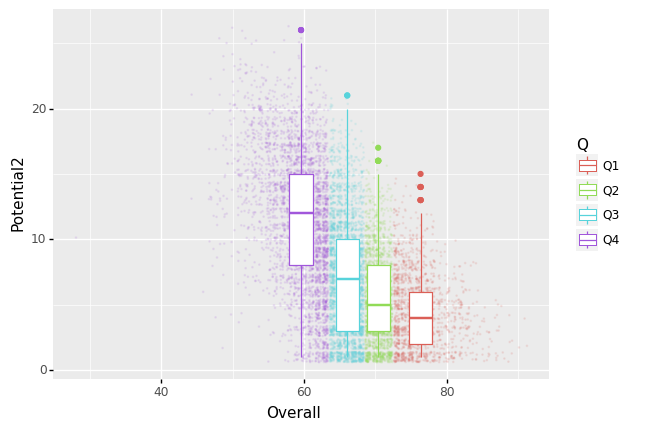

<ggplot: (8775297881787)>

In [135]:
ggplot(data=fifa22.query('Potential2>0.1'))\
+geom_point(aes(x='Overall', y='Potential2',color='Q'),alpha=0.1,size=0.1,position='jitter')\
+geom_boxplot(aes(x='Qx', y='Potential2',color='Q'))

### 숙제 

fifa22 데이터셋에서 `Q==Q1`이고, `Potentail2>20` 인 선수들의 이름을 출력하라. 

In [150]:
H = fifa22.query('Q=="Q1" and Potential2>20')

In [151]:
H['Name']

Series([], Name: Name, dtype: object)